<center>
<img src="logo.png" height="900"> 
</center>


#  Аварии на шахтах

In [1]:
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [3]:
import pandas as pd

df = pd.read_csv("data/coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

<Axes: >

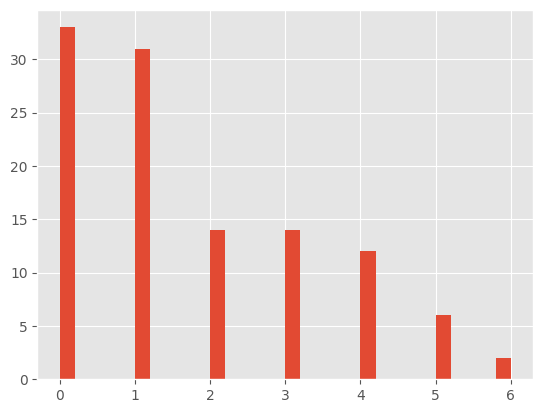

In [6]:
df['count'].hist(bins=30)

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [7]:
n_hat = df.shape[0]   # число наблюдений 
lam_hat = df['count'].mean()      # ваша оценка метода моментов

print(n_hat, lam_hat)


112 1.7053571428571428


In [8]:
# проверка, что оценка была найдена корректно 
# похожие тесты, но для lam_hat скрыты от вас
# они запустятся после того как вы сдадите тетрадку на проверку в грейдер

assert n_hat == 112 


__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [11]:
lam_se = np.sqrt(lam_hat / n_hat)        # ваша оценка
lam_se


0.1233953121525469

In [13]:
# проверка, что оценка была найдена корректно 
assert lam_se < 1.6474

# несколько похожих тестов скрыты от вас


__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [14]:
alpha = 0.1

left = lam_hat - sts.norm.ppf(1 - alpha / 2) * lam_se
right = lam_hat + sts.norm.ppf(1 - alpha / 2) * lam_se
delta = right - left

left, right, delta


(1.502389916114217, 1.9083243696000687, 0.4059344534858518)

In [15]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

# несколько похожих тестов скрыты от вас


__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [16]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05

left = (x.mean() - y.mean()) - sts.norm.ppf(1 - alpha / 2) * np.sqrt(x.mean() / len(x) + y.mean() / len(y))
right = (x.mean() - y.mean()) + sts.norm.ppf(1 - alpha / 2) * np.sqrt(x.mean() / len(x) + y.mean() / len(y))
delta = right - left
left, right, delta


(1.2835473859716393, 2.3100010011251353, 1.026453615153496)

In [17]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

# несколько похожих тестов скрыты от вас


Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [19]:
import math

def poiss_prob(k):
    return np.exp(-lam_hat) * lam_hat**k / math.factorial(k)

In [20]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

# похожие тесты скрыты от вас


__е) Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [21]:
from scipy.stats import norm

alpha = 0.05

prob = np.exp(-lam_hat) * (1 - lam_hat / math.factorial(2) * 2)
left = poiss_prob(1) - norm.ppf(1 - alpha / 2) * abs(prob) * np.sqrt(lam_hat / n_hat)
right = poiss_prob(1) + norm.ppf(1 - alpha / 2) * abs(prob) * np.sqrt(lam_hat / n_hat)
delta = right - left
left, right, delta

(0.27887850777625484, 0.34087378686549136, 0.06199527908923652)

In [22]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

# похожие тесты скрыты от вас


По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [44]:
def prob_ci(k, alpha = 0.01, lam_hat=lam_hat):
    prob = []
    
    if k == 0: 
        prob = -np.exp(-lam_hat)
    else: 
        prob = np.exp(-lam_hat) * (lam_hat**(k - 1) - lam_hat**k / math.factorial(k + 1) * (k + 1))
    
    left = poiss_prob(1) - norm.ppf(1 - alpha / 2) * abs(prob) * np.sqrt(lam_hat / n_hat)
    right = poiss_prob(1) + norm.ppf(1 - alpha / 2) * abs(prob) * np.sqrt(lam_hat / n_hat)
    
    return left, right

In [45]:
left, right = prob_ci(1)
delta = right - left

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0)
delta = right - left

assert np.abs(delta - 0.11551) < 1e-5

Сделали функцию? Запускайте код для не очень информативной картинки!

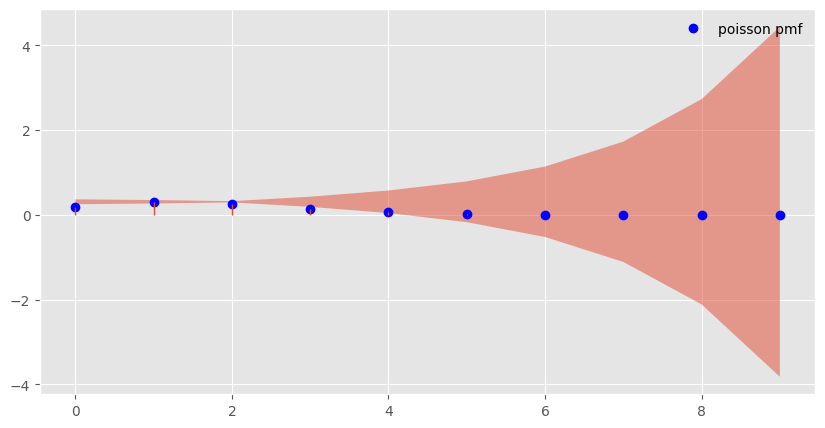

In [46]:
poiss_rv = sts.poisson(lam_hat)

x = np.arange(10)

p = poiss_rv.pmf(x)
left, right = zip(*[prob_ci(k) for k in x])

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [47]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.25212 и 0.36763
Вероятность P(X=1) лежит между  0.26914 и 0.35061
Вероятность P(X=2) лежит между  0.29537 и 0.32439
Вероятность P(X=3) лежит между  0.18965 и 0.4301
Вероятность P(X=4) лежит между  0.043789 и 0.57596
Вероятность P(X=5) лежит между  -0.17167 и 0.79142
Вероятность P(X=6) лежит между  -0.52119 и 1.1409
Вероятность P(X=7) лежит между  -1.1103 и 1.73
Вероятность P(X=8) лежит между  -2.1127 и 2.7325
Вероятность P(X=9) лежит между  -3.8216 и 4.4414


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [48]:
df['count'].mean()

1.7053571428571428

In [49]:
df['count'].var()

2.714205276705277

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.